# Outline

Topics to Cover:
- Image Processing
- MLP
- CNN

# 1. Dealing with Images in Python

### Step-1: Import openCV library

In [ ]:
import cv2 # cv2 refers to Open-CV Library

### Step-2: Mount Google Drive
- Open this link and create a local copy of the folder: https://drive.google.com/drive/folders/1bb6AWUPyPzZ5rd3Yi9uKZIgWjgjwG8qD?usp=sharing
- Mount Google Drive and copy the path to our images

### Step-3: Load and View Images

In [ ]:
# img1 = cv2.imread("/content/drive/My Drive/images2/images/1.jpg")
img1 = cv2.imread("/content/drive/My Drive/3DVSS_Day0/images2/1.jpg")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


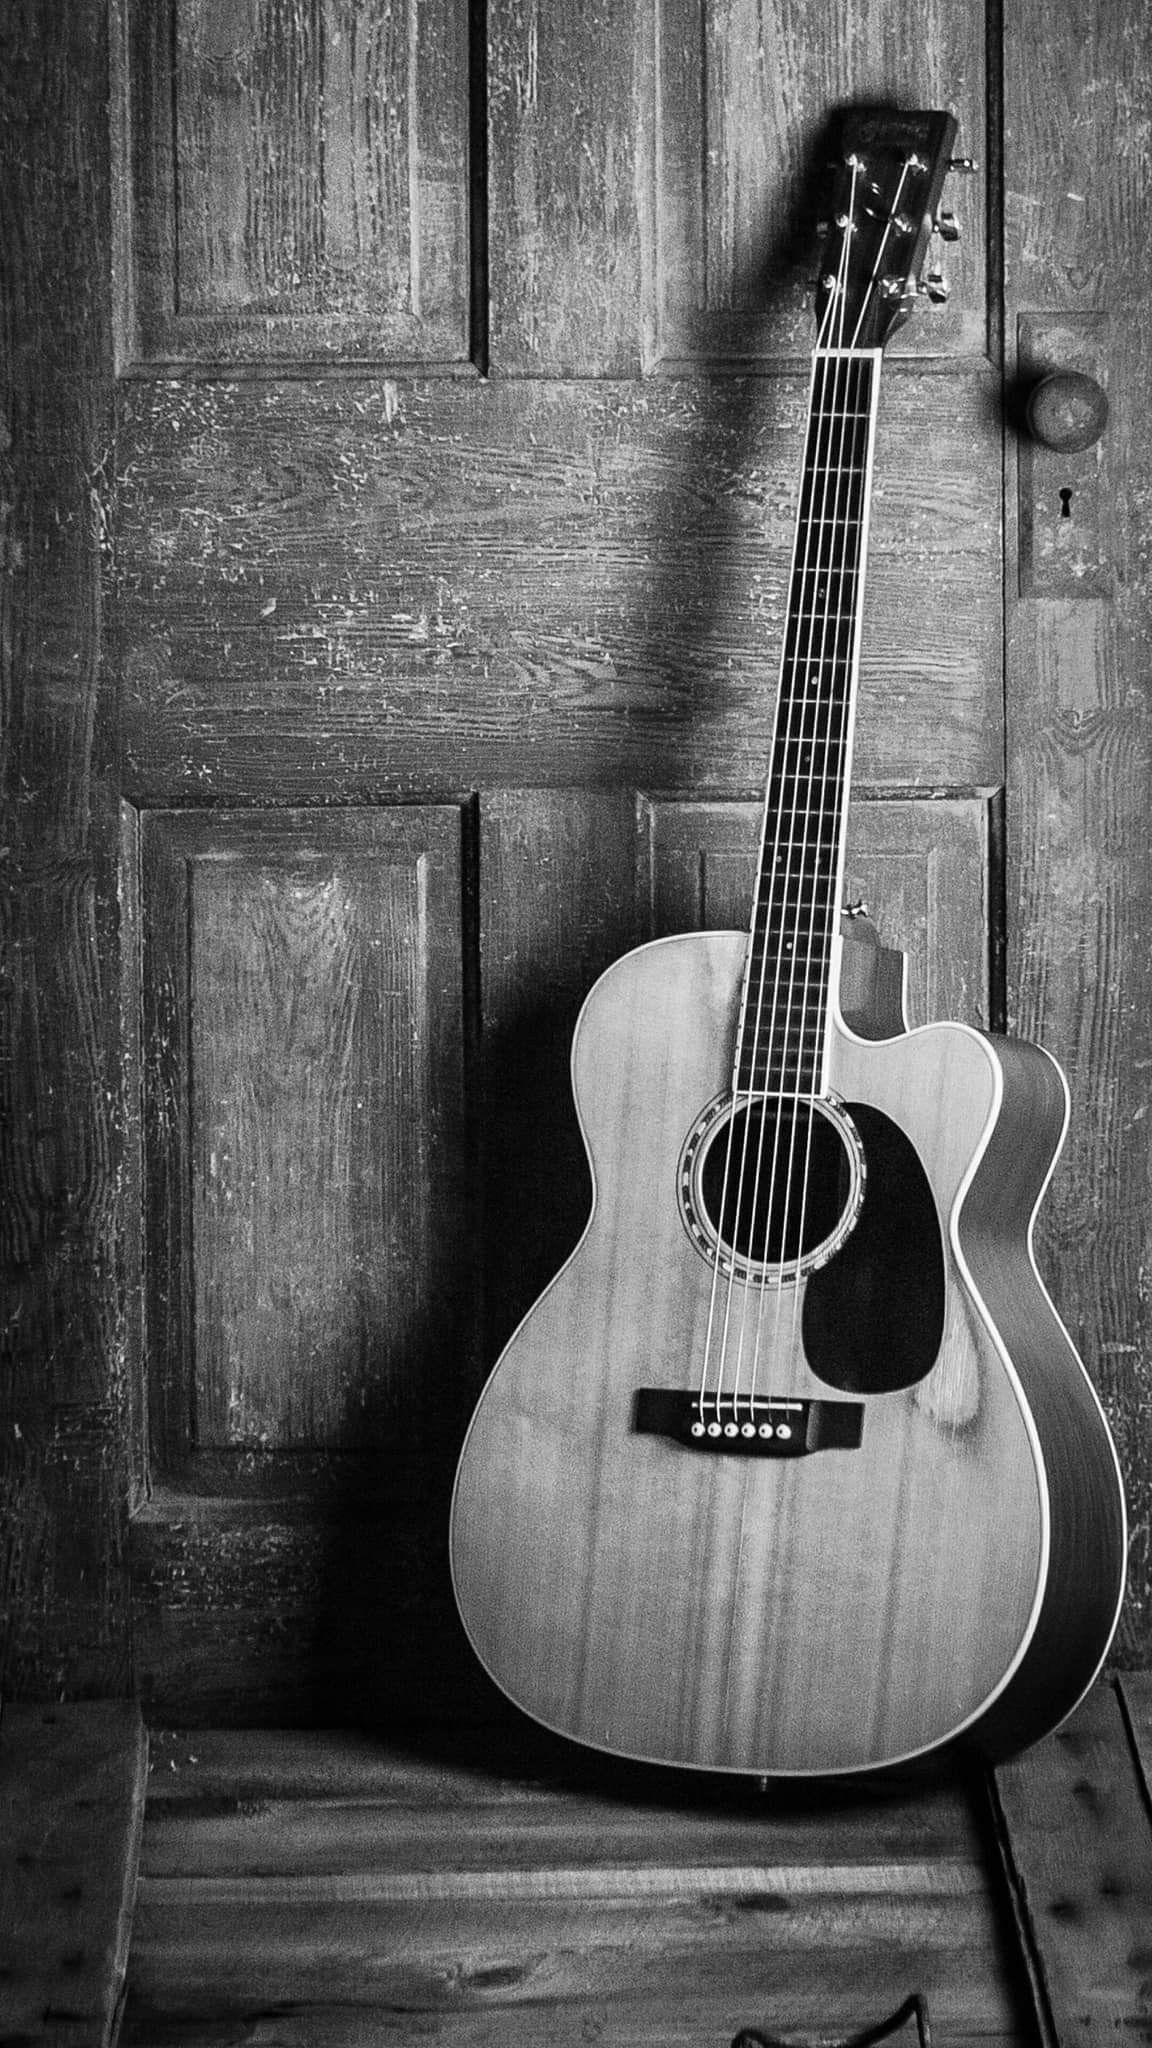

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img1)

**How to view this image at an appropriate scale?**

Let's welcome Matplotlib

### Matplotlib

- One of the most common visualization tools in python

In [ ]:
import matplotlib.pyplot as plt

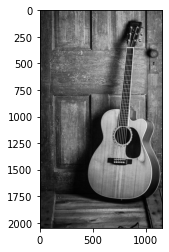

In [ ]:
plt.imshow(img1)

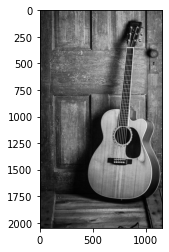

In [ ]:
plt.imshow(img1)
plt.show()

**Questions**
- What is the significance of plt.show()?
- Is there any difference in the outputs of the above cells

## Task-1: Load an image
- Load 2.jpg from the same folder

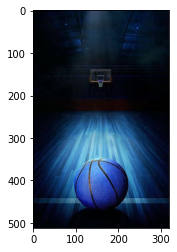

In [ ]:
img2 = cv2.imread("/content/drive/MyDrive/3DVSS_Day0/images/2.jpg")
plt.imshow(img2)

**Questios:**
- Why does the above image have a weird appearance?
- How do we solve this issue?

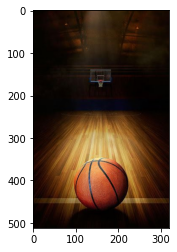

In [ ]:
img2 = cv2.imread("/content/drive/MyDrive/3DVSS_Day0/images/2.jpg")
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2_rgb)

We can also do the colour conversion directly when reading

**Note:** Copy-paste and explicitly remove

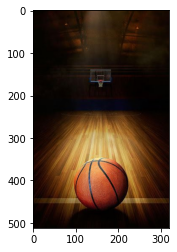

In [ ]:
img2_rgb = cv2.cvtColor(cv2.imread("/content/drive/MyDrive/3DVSS_Day0/images/2.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(img2_rgb)

# 2. Basic Image Operations

## Converting an Image to Grayscale

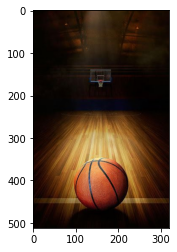

In [ ]:
plt.imshow(img2_rgb)

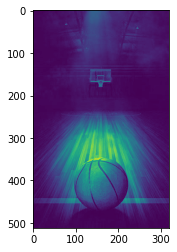

In [ ]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2_gray)

**Question:** Why is this image looking weird? And how to fix it?

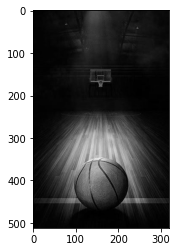

In [ ]:
plt.imshow(img2_gray, cmap='gray')

Let's check out the dimensions of these images

In [ ]:
print(img2.shape)
print(img2_rgb.shape)
print(img2_gray.shape)

(512, 320, 3)
(512, 320, 3)
(512, 320)


**Questions:**
- What do the above dimensions represent?
- Try converting img2 (the BGR one) to gray? (Think what the code can be?)
- Convert RGB to Gray Manually?

### RGB to Grayscale (Manually)

#### Naiive Way

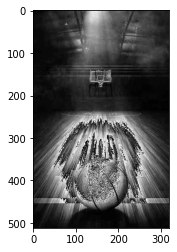

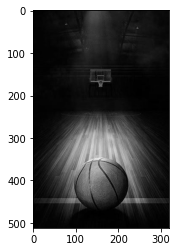

In [ ]:
img2_gray_manual_naive = (img2_rgb[:,:,0] + img2_rgb[:,:,1] + img2_rgb[:,:,2]) // 3
plt.imshow(img2_gray_manual_naive, cmap='gray')
plt.show()
plt.imshow(img2_gray, cmap='gray')
plt.show()

### Advanced Way

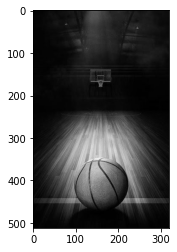

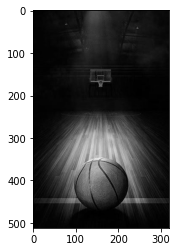

In [ ]:
img2_gray_manual_adv = 0.299*img2_rgb[:,:,0] + 0.587*img2_rgb[:,:,1] + 0.114*img2_rgb[:,:,2]
plt.imshow(img2_gray_manual_adv, cmap='gray')
plt.show()
plt.imshow(img2_gray, cmap='gray')
plt.show()

**Note:** Talk about Bayer filter

**Note about '/' vs '//'**

In [ ]:
print("\nPrinting img2\n")
print(img2)
print("\nPrinting img2_temp\n")
tempimg = (img2_rgb[:,:,0] + img2_rgb[:,:,1] + img2_rgb[:,:,2]) / 3
print(tempimg)
print("\nPrinting tempimg2\n")
tempimg2 = (img2_rgb[:,:,0] + img2_rgb[:,:,1] + img2_rgb[:,:,2]) // 3
print(tempimg2)


Printing img2

[[[ 0  4  5]
  [ 0  4  5]
  [ 0  4  5]
  ...
  [ 2 10 23]
  [ 2 10 23]
  [ 2 10 23]]

 [[ 0  4  5]
  [ 0  4  5]
  [ 0  4  5]
  ...
  [ 2 10 23]
  [ 2 10 23]
  [ 2 10 23]]

 [[ 0  4  7]
  [ 0  4  7]
  [ 0  4  7]
  ...
  [ 2 10 23]
  [ 2 10 23]
  [ 2 10 23]]

 ...

 [[ 0  1  6]
  [ 0  1  6]
  [ 0  1  6]
  ...
  [ 0  1  5]
  [ 0  1  5]
  [ 0  1  5]]

 [[ 0  1  6]
  [ 0  1  6]
  [ 0  1  6]
  ...
  [ 0  0  4]
  [ 0  0  4]
  [ 0  0  4]]

 [[ 0  1  6]
  [ 0  1  6]
  [ 0  1  6]
  ...
  [ 0  0  4]
  [ 0  0  4]
  [ 0  0  4]]]

Printing img2_temp

[[ 3.          3.          3.         ... 11.66666667 11.66666667
  11.66666667]
 [ 3.          3.          3.         ... 11.66666667 11.66666667
  11.66666667]
 [ 3.66666667  3.66666667  3.66666667 ... 11.66666667 11.66666667
  11.66666667]
 ...
 [ 2.33333333  2.33333333  2.33333333 ...  2.          2.
   2.        ]
 [ 2.33333333  2.33333333  2.33333333 ...  1.33333333  1.33333333
   1.33333333]
 [ 2.33333333  2.33333333  2.33333333 .

# 3.Quantization

**Question**: Are "black and white" images actually just black and white?

Consider the two images below

In [ ]:
import numpy as np

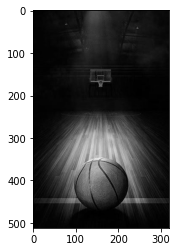

False

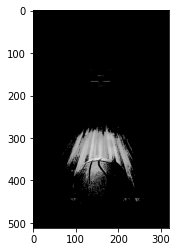

In [ ]:
img2_bw = np.where(img2_gray < 128, 0, img2_gray)
plt.imshow(img2_gray, cmap='gray')
plt.show()
plt.imshow(img2_bw, cmap='gray')
cv2.imwrite("/content/drive/MyDrive/3DVSS_Day0/images/2_gray.jpg", img2_gray)
cv2.imwrite("/content/drive/MyDrive/3DVSS_Day0/images/2_bw.jpg", img2_bw)

**Notes:**
- Why did I use plt.show()? (Run cell without it and show [but comment out other stuff\])
- About cv2.imwrite
- About shift+tab
- About B/W vs Grayscale

## Theory: 256 Shades of Gray
- 1 pixel in a usual image occupies up to 1 byte (8 bits) and can represent 256 colour levels (256 different intensities) FOR EACH CHANNEL (see data type of image below)
- However, we can change this value (We can represent only 128 unique intensity levels [7 bits per pixel\], 64 unique intensities [6 bits per pixel and so on\]
- In the above "black and white" image, we see only two different colours

In [ ]:
print("Data type of img2 is:", img2_gray.dtype)

Data type of img2 is: uint8



#########################################################

Showing Image with 256 intensity levels 


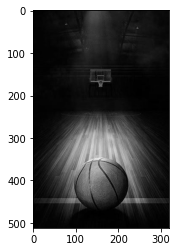

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 223 224 225 227 228 234]
Number of unique colour values are: 228; Min and max pixel values are: 0 (

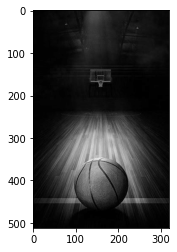

[  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
 180 182 184 186 188 190 192 194 196 198 200 202 204 206 208 210 212 214
 216 218 220 222 224 226 228 234]
Number of unique colour values are: 116; Min and max pixel values are: 0 (min) and 234(max)

#########################################################

Showing Image with 64 intensity levels 


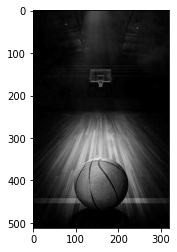

[  0   4   8  12  16  20  24  28  32  36  40  44  48  52  56  60  64  68
  72  76  80  84  88  92  96 100 104 108 112 116 120 124 128 132 136 140
 144 148 152 156 160 164 168 172 176 180 184 188 192 196 200 204 208 212
 216 220 224 228 232]
Number of unique colour values are: 59; Min and max pixel values are: 0 (min) and 232(max)

#########################################################

Showing Image with 32 intensity levels 


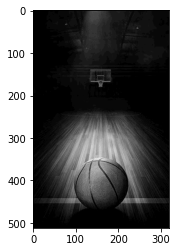

[  0   8  16  24  32  40  48  56  64  72  80  88  96 104 112 120 128 136
 144 152 160 168 176 184 192 200 208 216 224 232]
Number of unique colour values are: 30; Min and max pixel values are: 0 (min) and 232(max)

#########################################################

Showing Image with 16 intensity levels 


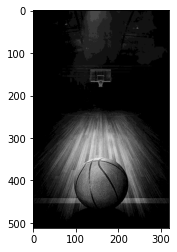

[  0  16  32  48  64  80  96 112 128 144 160 176 192 208 224]
Number of unique colour values are: 15; Min and max pixel values are: 0 (min) and 224(max)

#########################################################

Showing Image with 8 intensity levels 


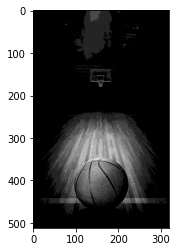

[  0  32  64  96 128 160 192 224]
Number of unique colour values are: 8; Min and max pixel values are: 0 (min) and 224(max)

#########################################################

Showing Image with 4 intensity levels 


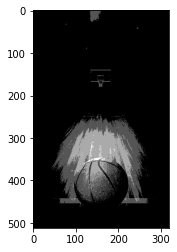

[  0  64 128 192]
Number of unique colour values are: 4; Min and max pixel values are: 0 (min) and 192(max)

#########################################################

Showing Image with 2 intensity levels 


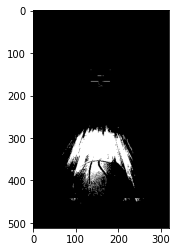

[  0 128]
Number of unique colour values are: 2; Min and max pixel values are: 0 (min) and 128(max)


In [ ]:
for i in range(8):
    print("\n#########################################################\n")
    print("Showing Image with %d intensity levels "%(256/(2**i)))
    tempimg = (img2_gray // (2**i)) * (2**i)
    plt.imshow(tempimg, cmap='gray')
    plt.show()
    print(np.unique(tempimg))
    print("Number of unique colour values are: %d; Min and max pixel values are: %d (min) and %d(max)"%(len(np.unique(tempimg)), np.min(tempimg), np.max(tempimg)))


**Note:** Relate this to quantization

## Representing images in [0-1] range
- We can also represent images in [0-1\] range (Benefit: CNNs)
- But don't mix the two

Min, max 234 0
Min, max 0.9176470588235294 0.0


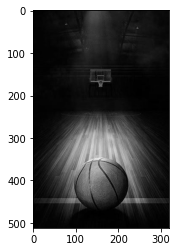

In [ ]:
print("Min, max", img2_gray.max(), img2_gray.min())
tempimg = img2_gray/255 # Note: 255, not 256 (Be careful!)
print("Min, max", tempimg.max(), tempimg.min())
plt.imshow(tempimg, cmap='gray')
plt.show()

# Intensity Transforms

- In case it is not clear by now, images are simply matrices (Show self-made image)
- We can use regular mathematical matrix operations (including addition and subtraction) to manipulate images 

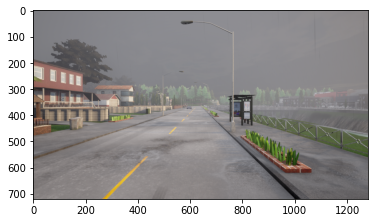

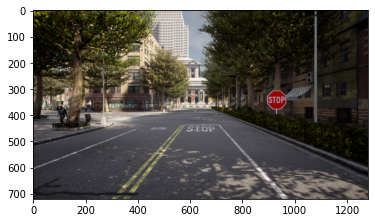

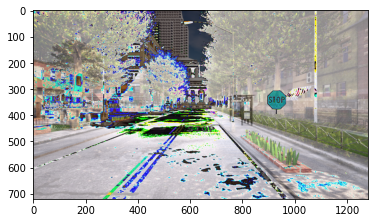

In [ ]:
img1 = cv2.cvtColor(cv2.imread("/content/drive/MyDrive/3DVSS_Day0/images/carla_1.png"), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread("/content/drive/MyDrive/3DVSS_Day0/images/carla_3.png"), cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()
plt.imshow(img1+img2)
plt.show()

In [ ]:
# img = cv2.cvtColor(cv2.imread("/content/drive/MyDrive/3DVSS_Day0/images/carla_1.png"), cv2.COLOR_BGR2RGB)
# mask = cv2.cvtColor(cv2.imread("/content/drive/MyDrive/3DVSS_Day0/images/carla_1_mask.png"), cv2.COLOR_BGR2RGB)
# plt.imshow(img)
# plt.show()
# plt.imshow(mask)
# plt.show()

# plt.imshow(img + mask)
# plt.show()

# plt.imshow(img + mask//2)
# plt.show()

# green_mask = np.zeros(mask.shape).astype('uint8') # Example where that 0-1 Vs 0-255 mix up can happen -- See commented code below
# green_mask[:,:,2] = mask[:,:,2]

# # plt.imshow(img + 0.5*green_mask) # Error example
# # plt.show()



## Linear Contrast Stretching

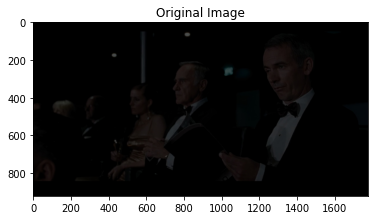

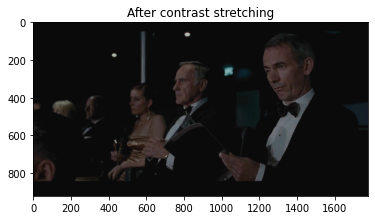

In [ ]:
def linContrastStretching(im, a, b):
    """ Formula used:
        S=(R-c)*((b-a)/(d-c))+a; where:
            S is the output image
            R is the input image
            c,d are the old min and max intensities respectively
            a,b are the new min and max intensities respectively
    """
   # Find and store the original max and min values of the image
    c=im.min()
    d=im.max()
    # Create a new array with the same dimensions as the earlier image 
    new_img=np.zeros(im.shape)
    
    new_img=(im-c)*((b-a)/(d-c))+a #Perform the operation for contrast stretching
    new_img=new_img.astype('uint8') #Data type correction
    return new_img

img = cv2.cvtColor(cv2.imread("/content/drive/MyDrive/3DVSS_Day0/images/quantum_bad.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Original Image')
plt.show()

# Image after contrast stretching
final_image=linContrastStretching(img, 10, 200)
plt.imshow(final_image)
plt.title('After contrast stretching')
plt.show()

## Power Transform
$I_{n} = c*I_{o}^{\gamma}$
- $c$ is chosen such that image range remains in [0-255\] range
- For example, if we choose $\gamma = 2$, we'll calculate $c$ as 
folllows:

    - For $I_o = 0$, $I_n = c*0^2$ 
    - For $I_o = 255$, $I_n = c*(255^2)$
    - Now we want that the image should remain in the range of [0-255\] only. So for the above calculation, we will put $c=1/255$

**Note**: Show the calculations (Also show for the case when images are in the range of [0-1\]

In [ ]:
gamma = 2
c = 1/255
for i in range(256):
    print("i: %d\t power transform of i: %d"%(i, c*(i**gamma)))

i: 0	 power transform of i: 0
i: 1	 power transform of i: 0
i: 2	 power transform of i: 0
i: 3	 power transform of i: 0
i: 4	 power transform of i: 0
i: 5	 power transform of i: 0
i: 6	 power transform of i: 0
i: 7	 power transform of i: 0
i: 8	 power transform of i: 0
i: 9	 power transform of i: 0
i: 10	 power transform of i: 0
i: 11	 power transform of i: 0
i: 12	 power transform of i: 0
i: 13	 power transform of i: 0
i: 14	 power transform of i: 0
i: 15	 power transform of i: 0
i: 16	 power transform of i: 1
i: 17	 power transform of i: 1
i: 18	 power transform of i: 1
i: 19	 power transform of i: 1
i: 20	 power transform of i: 1
i: 21	 power transform of i: 1
i: 22	 power transform of i: 1
i: 23	 power transform of i: 2
i: 24	 power transform of i: 2
i: 25	 power transform of i: 2
i: 26	 power transform of i: 2
i: 27	 power transform of i: 2
i: 28	 power transform of i: 3
i: 29	 power transform of i: 3
i: 30	 power transform of i: 3
i: 31	 power transform of i: 3
i: 32	 power trans

In [ ]:
gamma = 0.5
c = np.sqrt(255)
for i in range(256):
    print("i: %d\t power transform of i: %d"%(i, c*(i**gamma)))

i: 0	 power transform of i: 0
i: 1	 power transform of i: 15
i: 2	 power transform of i: 22
i: 3	 power transform of i: 27
i: 4	 power transform of i: 31
i: 5	 power transform of i: 35
i: 6	 power transform of i: 39
i: 7	 power transform of i: 42
i: 8	 power transform of i: 45
i: 9	 power transform of i: 47
i: 10	 power transform of i: 50
i: 11	 power transform of i: 52
i: 12	 power transform of i: 55
i: 13	 power transform of i: 57
i: 14	 power transform of i: 59
i: 15	 power transform of i: 61
i: 16	 power transform of i: 63
i: 17	 power transform of i: 65
i: 18	 power transform of i: 67
i: 19	 power transform of i: 69
i: 20	 power transform of i: 71
i: 21	 power transform of i: 73
i: 22	 power transform of i: 74
i: 23	 power transform of i: 76
i: 24	 power transform of i: 78
i: 25	 power transform of i: 79
i: 26	 power transform of i: 81
i: 27	 power transform of i: 82
i: 28	 power transform of i: 84
i: 29	 power transform of i: 85
i: 30	 power transform of i: 87
i: 31	 power transf

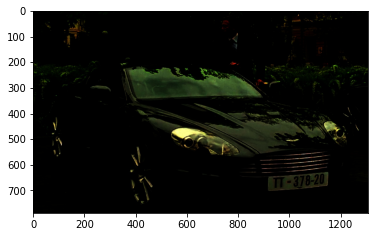

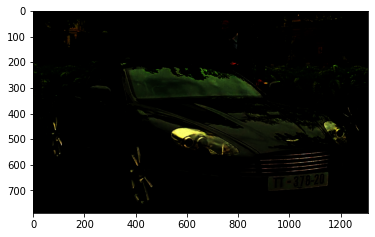

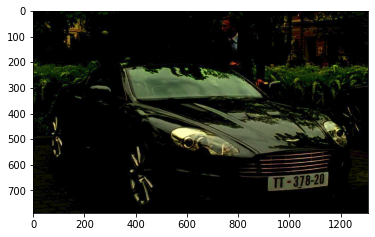

In [ ]:
def powertransform(img, gamma, c):
    new_img=c*(img ** gamma) #Perform the transformation
    new_img=new_img.astype('uint8') #Data type correction
    return new_img

img = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/3DVSS_Day0/images/aston_invisible.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

gamma = 1.4
c = 255**(1-gamma)
img_darkened = powertransform(img, gamma, c)
plt.imshow(img_darkened)
plt.show()

gamma = 0.5
c = 255**(1-gamma)
img_lightened = powertransform(img, gamma, c)
plt.imshow(img_lightened)
plt.show()

# To Do: Histogram Processing

# Morphological Operations

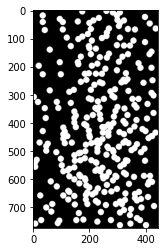

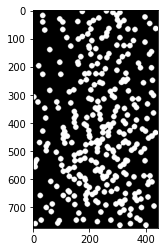

In [ ]:
kernel = np.ones((3, 3), np.uint8)
img = cv2.imread("/content/drive/MyDrive/3DVSS_Day0/images/coins.jpg")
plt.imshow(img)
plt.show()
# Using cv2.erode() method 
tempimg = cv2.erode(img, kernel)
plt.imshow(tempimg)

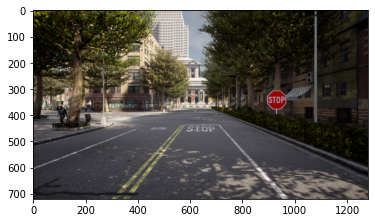

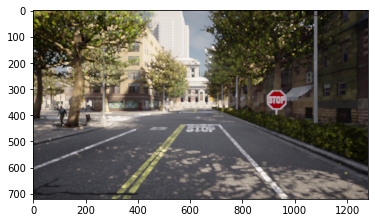

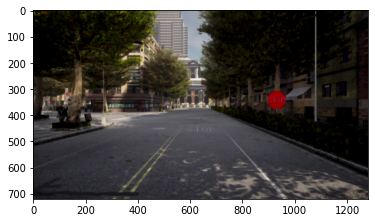

In [ ]:
kernel = np.ones((5, 5), np.uint8)
img = cv2.cvtColor(cv2.imread("/content/drive/MyDrive/3DVSS_Day0/images/carla_3.png"), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
# Using cv2.erode() method 
tempimg = cv2.dilate(img, kernel)
plt.imshow(tempimg)
plt.show()

tempimg = cv2.erode(img, kernel)
plt.imshow(tempimg)
plt.show()

# Rotating Images

In [ ]:
def isValid(x, y, rows, cols):
    return (0<=x<rows and 0<=y<cols)

def rotImage(img, theta, retain):
    m,n = img.shape
    new_image = np.zeros((m,n))
    theta_rad = theta*np.pi / 180
    R = np.array([np.array([np.cos(theta_rad), np.sin(theta_rad)]), np.array([-np.sin(theta_rad), np.cos(theta_rad)])])
    if retain:
        for i in range(m):
            for j in range(n):
                X = np.array([np.array([i - m//2]), np.array([j - n//2])])
                X = X.reshape((-1,2))
                rotated_X = X@R
                rotated_x = int(rotated_X[0][0]) + m//2
                rotated_y = int(rotated_X[0][1]) + n//2
                if isValid(rotated_x,rotated_y,m,n):
                    new_image[i][j] = img[rotated_x][rotated_y]
                else:
                    new_image[i][j] = 0
        return new_image
    
    arr_x = []
    arr_y = []
    # Step-1: Find where a given pixel (x,y) will go after rotation
    for i in range(m):
        for j in range(n):
            X = np.array([np.array([i - m//2]), np.array([j - n//2])])
            X = X.reshape((-1,2))
            rotated_X = X@R
            arr_x.append(int(rotated_X[0][0]))
            arr_y.append(int(rotated_X[0][1]))

    # Step-2: Find min & max extent of x and y. And then perform rotation
    old_m = m
    old_n = n
    m = max(arr_x) - min(arr_x)
    n = max(arr_y) - min(arr_y)
    new_image = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            X = np.array([np.array([i - m//2]), np.array([j - n//2])])
            X = X.reshape((-1,2))
            rotated_X = X@R
            rotated_x = int(rotated_X[0][0]) + old_m//2
            rotated_y = int(rotated_X[0][1]) + old_n//2
            if isValid(rotated_x,rotated_y,old_m,old_n):
                new_image[i][j] = img[rotated_x][rotated_y]
            else:
                new_image[i][j] = 0
    return new_image

In [ ]:
def showImage(img, gray = True, title=''):
    """Function to display images"""
    if gray:
        plt.imshow(img, cmap = 'gray') # Use cmap = 'gray' argument for grayscale image
        plt.title(title)
        plt.show()
    else:
        plt.imshow(img)
        plt.title(title)
        plt.show()
    return None

def readImage(path, colour = True, makeGray = False):
    """Function to read images from a given path"""
    img = cv2.imread(path)
    if colour:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB because we are reading with openCV
                                                    # But displaying with matplotlib
    if makeGray:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # Convert to Grayscale if makeGray is set to True
    return img

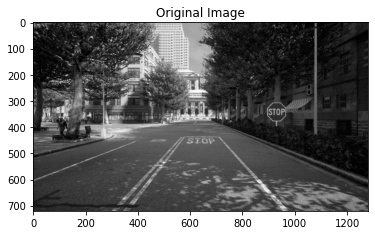

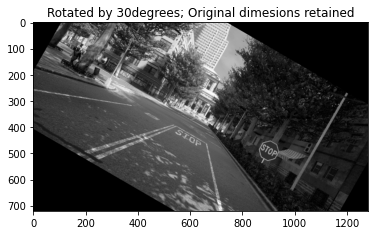

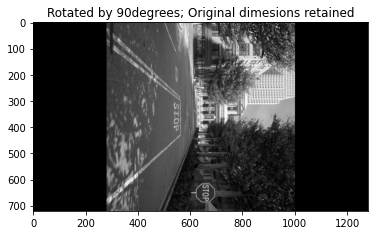

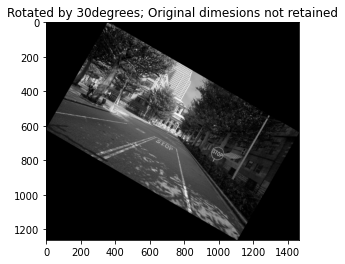

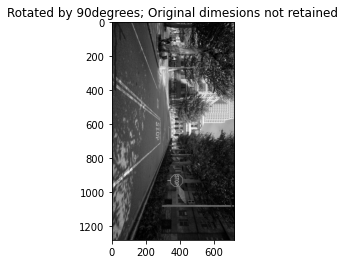

In [ ]:
img = readImage("/content/drive/MyDrive/3DVSS_Day0/images/carla_3.png", colour=True, makeGray=True)
showImage(img, title = "Original Image")

# for i in range(1,6):
for i in [1,3]:
    rotated_img = rotImage(img, i*30, True)
    showImage(rotated_img, title = "Rotated by " + str(i*30) + "degrees; Original dimesions retained")
# for i in range(1,6):
for i in [1,3]:
    rotated_img = rotImage(img, i*30, False)
    showImage(rotated_img, title = "Rotated by " + str(i*30) + "degrees; Original dimesions not retained")    

**Note:** Talk about skimage and PIL here